# Basic example of using SubStrat
## **When using Google Colab**

[Link for google colab example](https://colab.research.google.com/drive/1AnsUZuiPGvn1bVfV0YuRMkjOKSoUlUQx?usp=sharing)

Build scikit-learn for python3.10.  
Please be advised that this process will take a few minutes to complete.

In [1]:
!pip install scikit-learn==0.24.2 --no-build-isolation

### Installing the package

In [ ]:
!pip install substrat-automl

**Restart Runtime**  
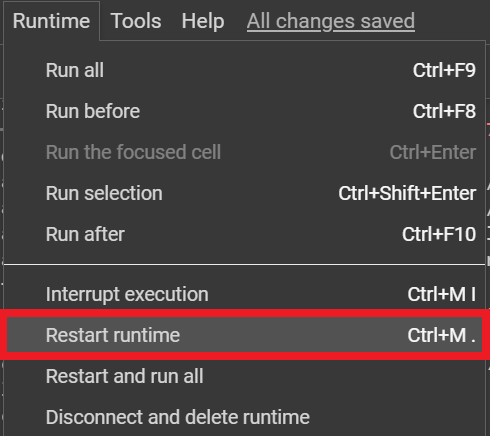


#### Imports

In [1]:
from SubStrat import SubStrat
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.metrics
import sklearn.datasets
from autosklearn.classification import AutoSklearnClassifier
from sklearn.utils import Bunch


### read the dataset
- Usually using the read_csv of pandas.
- Put attantion that the databaset needs to be able to be learned using AutoSklearn.


In [2]:
# data = pd.read_csv("you_dataset_path")
# target_col = "target" # or any other column to predict

# For the example
b: Bunch = sklearn.datasets.load_breast_cancer(as_frame=True)

In [3]:
data = b.frame
target_col = "target"

#### Basic run, can be very easy to use  
Create the SubStrat object and then use the method `run`  
The output of function `run` is ` AutoSklearnClassifier`  

In [4]:
s = SubStrat(data, target_col)

SubStart **today** can only use autosklern.  
SubStrat Allow to use custom `AutoSklearnClassifier`.

In [ ]:
custom_cls = AutoSklearnClassifier() 
s = SubStrat(data, target_col, custom_cls)

#### Start SubStrat flow

In [5]:
cls = s.run()

Starting summary algorithm


100%|██████████| 25/25 [01:48<00:00,  4.32s/it]


Start fit Sub data at 2023-08-24 00:07:51.960383
Stopping early! Achieved accuracy of 1.0000 which is above or equal to the threshold of 0.8500.
Sub data Accuracy score: 0.8333
Start fit Fine-tuned at 2023-08-24 00:08:17.676716
Stopping early! Achieved accuracy of 0.9858 which is above or equal to the threshold of 0.9500.
Fine-tuned Accuracy score: 0.9510


Now can predict on the database

In [6]:
X = data.drop(target_col, axis=1).values
y = data[target_col].values
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
y_pred = cls.predict(X_valid)
accuracy_substrat = sklearn.metrics.accuracy_score(y_valid, y_pred)


In [8]:
print(accuracy_substrat)

0.9912280701754386
